In [ ]:
!pip install numpy
!pip install pandas
!pip install datetime

In [ ]:
import pandas as pd
df=pd.read_csv("/content/MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,243.080002,245.750000,237.399994,239.580002,237.474335,25740000
1,2023-01-04,232.279999,232.869995,225.960007,229.100006,227.086441,50623400
2,2023-01-05,227.199997,227.550003,221.759995,222.309998,220.356125,39585600
3,2023-01-06,223.000000,225.759995,219.350006,224.929993,222.953110,43613600
4,2023-01-09,226.449997,231.240005,226.410004,227.119995,225.123825,27369800
...,...,...,...,...,...,...,...
245,2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100
246,2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100
247,2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400
248,2023-12-28,375.369995,376.459991,374.160004,375.279999,375.279999,14327000


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-12-29')
datetime_object

datetime.datetime(2023, 12, 29, 0, 0)

In [ ]:
df['Date']=(df["Date"]).apply(str_to_datetime)

In [ ]:
!pip install numpy
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
df["Volume"] = scaler.fit_transform(df[["Volume"]])

In [ ]:
def create_volume_dataframe(input_df, target_name='Volume'):
    volume_df= input_df
    volume_df["Target_Date"]=input_df["Date"]
    volume_df["Target"]=input_df["Volume"]
    volume_df['Target1'] = volume_df['Volume'].shift(1)
    volume_df['Target2'] = volume_df['Volume'].shift(2)
    volume_df['Target3'] = volume_df['Volume'].shift(3)
    result_df = volume_df[[ 'Target_Date', 'Target1', 'Target2','Target3','Target']]
    return volume_df

In [ ]:
windowed_df = create_volume_dataframe(df, "Volume")
windowed_df=windowed_df.drop(["Date","Open",	"High",	"Low","Close",	"Adj Close",	"Volume"],axis=1)

In [ ]:
windowed_df=windowed_df.dropna()

In [ ]:
def windowed_df_X_y(windowed_data):
  df_as_np=windowed_data.to_numpy()
  dates=df_as_np[:,0]
  middle_mat=df_as_np[:,1:-1]
  X=middle_mat.reshape(len(dates),middle_mat.shape[1],1)
  Y=df_as_np[:,-1]
  return dates,X.astype(np.float32),Y.astype(np.float32)

In [ ]:
dates,X,y=windowed_df_X_y(windowed_df)

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

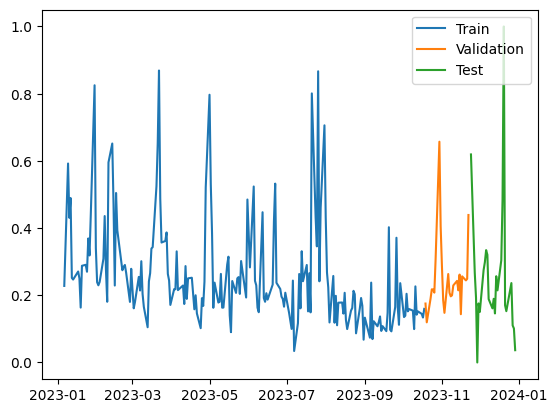

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                  layers.LSTM(92),
                  layers.Dense(64, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 98ms/step - loss: 0.0588 - mean_absolute_error: 0.1913 - val_loss: 0.0189 - val_mean_absolute_error: 0.0917
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0983 - val_loss: 0.0170 - val_mean_absolute_error: 0.1126
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0236 - mean_absolute_error: 0.1287 - val_loss: 0.0164 - val_mean_absolute_error: 0.1098
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0189 - mean_absolute_error: 0.1011 - val_loss: 0.0114 - val_mean_absolute_error: 0.0663
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0193 - mean_absolute_error: 0.0913 - val_loss: 0.0113 - val_mean_absolute_error: 0.0672
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0925 - val_loss: 0.0126 - val_mean_absolute_error: 0.0876
Epoch 7/100
7/7 [===========